In [ ]:
import os

PATH = 'C:\\Users\\CrankMuffler\\Documents\\GitHub\\RA2_alpine_lads'

os.chdir(PATH)

In [2]:
from dataset.landmarks_dataset import create_landmarks_dataframe

print(create_landmarks_dataframe('C:\\Users\\CrankMuffler\\Development\\Dream\\training_v2020_01_13\\Feet\\landmarks'))

           mtp_x       mtp_y      mtp_1_x     mtp_1_y     mtp_2_x     mtp_2_y  \
0     830.333333  294.000000   855.333333  575.666667  680.333333  557.333333   
1     305.687500  361.750000   277.562500  616.437500  460.375000  571.125000   
2     665.373134  330.298507   668.358209  549.701493  481.791045  516.865672   
3     194.060606  277.878788   178.909091  497.575758  334.969697  473.333333   
4     669.000000  310.035088   684.789474  545.122807  497.070175  518.807018   
..           ...         ...          ...         ...         ...         ...   
371   421.341463  376.926829   401.829268  757.414634  660.365854  681.804878   
372  1067.500000  397.000000  1022.500000  799.500000  757.500000  782.000000   
373   331.076923  530.769231   361.846154  930.769231  605.435897  900.000000   
374   244.073620  121.085890   254.503067  222.312883  190.699387  203.907975   
375    41.115607  127.323699    37.069364  229.057803  107.589595  208.826590   

        mtp_3_x     mtp_3_y

In [3]:
import json

json_path = 'C:\\Users\\CrankMuffler\\Development\\Dream\\training_v2020_01_13\\Feet\\landmarks\\UAB032-LF.json'

with open(json_path) as json_file:
    landmarks = json.load(json_file)
    
print(landmarks['shapes'])

[{'label': 'mtp_5', 'points': [[156.62264150943383, 855.0377358490566]], 'group_id': None, 'shape_type': 'point', 'flags': {}}, {'label': 'mtp_4', 'points': [[258.509433962264, 745.6037735849056]], 'group_id': None, 'shape_type': 'point', 'flags': {}}, {'label': 'mtp_3', 'points': [[349.07547169811323, 656.9245283018868]], 'group_id': None, 'shape_type': 'point', 'flags': {}}, {'label': 'mtp_2', 'points': [[428.3207547169811, 600.3207547169811]], 'group_id': None, 'shape_type': 'point', 'flags': {}}, {'label': 'mtp_1', 'points': [[628.3207547169811, 630.5094339622641]], 'group_id': None, 'shape_type': 'point', 'flags': {}}, {'label': 'mtp', 'points': [[562.2830188679245, 396.5471698113207]], 'group_id': None, 'shape_type': 'point', 'flags': {}}]


In [17]:
def get_labels_for_landmarks_json(landmarks_json):
    sorted_shapes = sorted(landmarks_json['shapes'], key = lambda k: k['label']) 
    
    N_points = len(sorted_shapes)
    labels = np.zeros(N_points * 2)
    
    for idx, shape in enumerate(sorted_shapes):
        labels_idx = idx * 2
        
        labels[labels_idx] = shape['points'][0][0]
        labels[labels_idx + 1] = shape['points'][0][1]
        
    return labels

labels = get_labels_for_landmarks_json(landmarks)

In [12]:
newlist = sorted(landmarks['shapes'], key=lambda k: k['label']) 

print(newlist)

[{'label': 'mtp', 'points': [[562.2830188679245, 396.5471698113207]], 'group_id': None, 'shape_type': 'point', 'flags': {}}, {'label': 'mtp_1', 'points': [[628.3207547169811, 630.5094339622641]], 'group_id': None, 'shape_type': 'point', 'flags': {}}, {'label': 'mtp_2', 'points': [[428.3207547169811, 600.3207547169811]], 'group_id': None, 'shape_type': 'point', 'flags': {}}, {'label': 'mtp_3', 'points': [[349.07547169811323, 656.9245283018868]], 'group_id': None, 'shape_type': 'point', 'flags': {}}, {'label': 'mtp_4', 'points': [[258.509433962264, 745.6037735849056]], 'group_id': None, 'shape_type': 'point', 'flags': {}}, {'label': 'mtp_5', 'points': [[156.62264150943383, 855.0377358490566]], 'group_id': None, 'shape_type': 'point', 'flags': {}}]


In [15]:
N = len(newlist)

x = np.zeros(N)
y = np.zeros(N)

for idx, point in enumerate(newlist):
    points = point['points']
    
    x[idx] = points[0][0]
    y[idx] = points[0][1]
    
print(np.concatenate((x, y)))

[562.28301887 628.32075472 428.32075472 349.0754717  258.50943396
 156.62264151 396.54716981 630.50943396 600.32075472 656.9245283
 745.60377358 855.03773585]


In [10]:
import operator

landmarks['shapes'].sort(key=operator.itemgetter('label'))

print(landmarks['shapes'])

[{'label': 'mtp', 'points': [[562.2830188679245, 396.5471698113207]], 'group_id': None, 'shape_type': 'point', 'flags': {}}, {'label': 'mtp_1', 'points': [[628.3207547169811, 630.5094339622641]], 'group_id': None, 'shape_type': 'point', 'flags': {}}, {'label': 'mtp_2', 'points': [[428.3207547169811, 600.3207547169811]], 'group_id': None, 'shape_type': 'point', 'flags': {}}, {'label': 'mtp_3', 'points': [[349.07547169811323, 656.9245283018868]], 'group_id': None, 'shape_type': 'point', 'flags': {}}, {'label': 'mtp_4', 'points': [[258.509433962264, 745.6037735849056]], 'group_id': None, 'shape_type': 'point', 'flags': {}}, {'label': 'mtp_5', 'points': [[156.62264150943383, 855.0377358490566]], 'group_id': None, 'shape_type': 'point', 'flags': {}}]


Original Size: (848, 1815)
(1815, 848, 3)


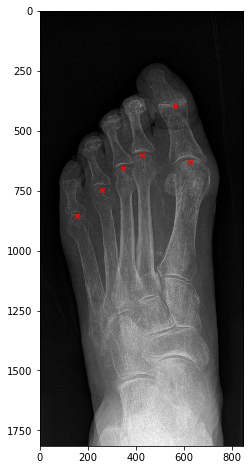

In [22]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

img_path = 'C:\\Users\\CrankMuffler\\Development\\Dream\\training_v2020_01_13\\UAB032-LF.jpg'

img = Image.open(img_path)
print('Original Size:', img.size)

image = np.asarray(img)
print(image.shape)

points = np.zeros((6, 2))
for idx, landmark in enumerate(landmarks['shapes']):
    points[idx, :] = np.array(landmark['points'])


plt.figure(figsize = (8, 8))
plt.imshow(image[:, :, 0], cmap="gray")
plt.scatter(labels[0::2], labels[1::2], 20, c = 'red', marker = 'x')
plt.show()

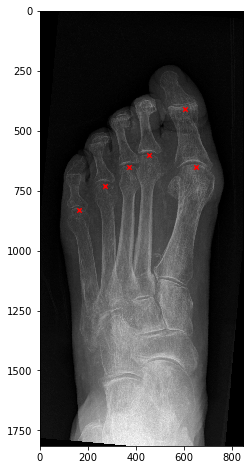

In [85]:
o_width, o_height = img.size

rot_angle = -5

rotated = img.rotate(rot_angle)

# PIL rotates the angle clockwise, but we need to calculate it for counter clockwise -> -1 * angle
sin_angle = np.sin(-1 * rot_angle * np.pi / 180)
cos_angle = np.cos(-1 * rot_angle * np.pi / 180)

m_x = o_width / 2
m_y = o_height / 2

new_points_x = (points[:, 0] - m_x) * cos_angle - (points[:, 1] - m_y) * sin_angle + m_x
new_points_y = (points[:, 0] - m_x) * sin_angle + (points[:, 1] - m_y) * cos_angle + m_y

rotated_image = np.asarray(rotated)

plt.figure(figsize = (8, 8))
plt.imshow(rotated_image[:, :, 0], cmap="gray")
plt.scatter(new_points_x, new_points_y, 20, c = 'red', marker = 'x')
# plt.scatter(new_points_x, new_points_y, 20, c = 'red', marker = 'x')
plt.show()

Smaller Size (239, 512)
(512, 239, 3)


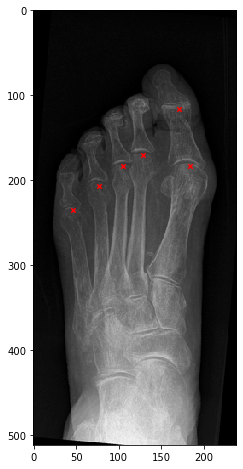

In [86]:
o_width, o_height = rotated.size

rotated.thumbnail((512, 512), Image.ANTIALIAS)
print('Smaller Size', rotated.size)

n_width, n_height = rotated.size

x_ratio = n_width / o_width
y_ratio = n_height / o_height

smaller_image = np.asarray(rotated)
print(smaller_image.shape)

plt.figure(figsize = (8, 8))
plt.imshow(smaller_image[:, :, 0], cmap="gray")
plt.scatter(x_ratio * new_points_x, y_ratio * new_points_y, 20, c = 'red', marker = 'x')
plt.show()